In [2652]:
import importlib
import Zer 
import numpy as np
import matplotlib.pyplot as plt
import math
importlib.reload(Zer)
np.set_printoptions(precision=16) 

array([[ 10000.    ,  -5000.    ,   2500.    ,  -1250.    ,    625.    ,
          -312.5   ,    156.25  ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    , -10000.    ,   5000.    ,
         -2500.    ,   1250.    ,   -625.    ,    312.5   ,   -156.25  ,
            -0.    ,     -0.    ,     -0.    ,     -0.    ,     -0.    ,
            -0.    ,     -0.    ,     -0.    ,     -0.    ,     -0.    ,
            -0.    ,     -0.    ,     -0.    ,     -0.    ,     -0.    ,
            -0.    ],
       [     0.    ,  10000.    , -10000.    ,   7500.    ,  -5000.    ,
          3125.    ,  -1875.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0.    ,      0.    ,      0.    ,      0.    ,
             0.    ,      0. 

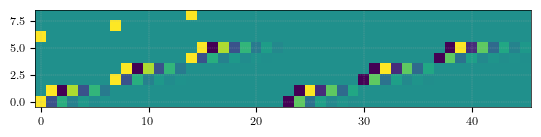

In [2653]:
rho=np.linspace(0,1,100)
theta=np.linspace(0,2*np.pi,100)
zer= Zer.Zer(10,100,rho,theta)
Z=zer.Construct_Zernike()
time1=np.linspace(0,1,50)
time2=np.linspace(0,1,50)
dZ_dx=np.ones(100)
dZ_dy=np.ones(100)
times=[time1,time2]
M=zer.Construct_M(times,2,dZ_dx,dZ_dy)
C=zer.Construct_C(times,2,10000,dZ_dx,dZ_dy)
plt.imshow(C)
C

2730
     time  x_coordinate  y_coordinate  z_coordinate
0  0.0000      0.000000      0.000000      0.400000
1  0.0002      0.011182      0.146894      0.399729
2  0.0004      0.044570      0.291045      0.398915
3  0.0006      0.099687      0.429746      0.397560
4  0.0008      0.175747      0.560364      0.395665


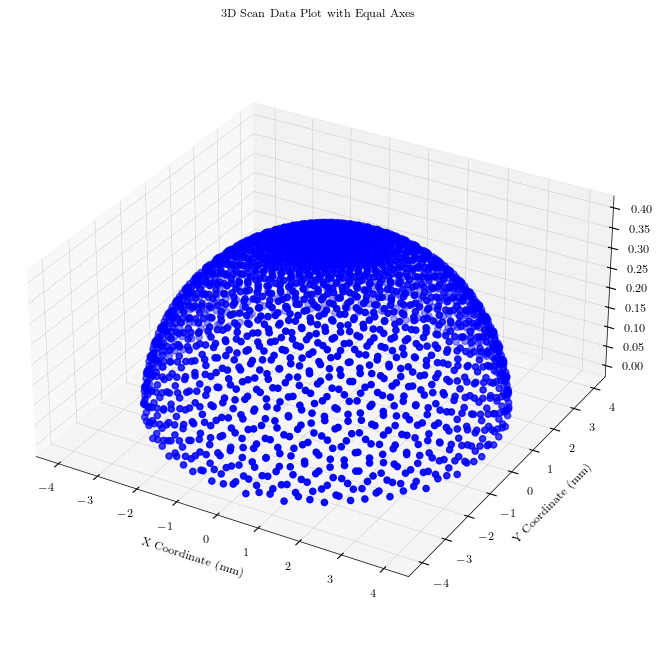

In [2654]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
R_SP = 4  # radius in mm
T = 0.546  # period in seconds
a = 16
b = 33
omega = 2 * np.pi / T
sampling_rate = 5000 # in Hz
total_samples = int(T * sampling_rate)  # total samples in one period
print(total_samples)
# Time array
t = np.linspace(0, T, total_samples)

# Scan pattern equations
x_sp = R_SP * np.sin(a * omega * t)*np.sin(b * omega * t)
y_sp = R_SP * np.cos(b * omega * t)*np.sin(a * omega * t)
z_sp = 0.1*np.sqrt(np.abs((R_SP)**2 - x_sp**2 - y_sp**2))

# Update the dataset with z-coordinate
# Creating the dataset
scan_data = pd.DataFrame({
    'time': t,
    'x_coordinate': x_sp,
    'y_coordinate': y_sp,
    'z_coordinate':z_sp
})
filtered_data = scan_data[(scan_data['x_coordinate'] != 0) & (scan_data['y_coordinate'] != 0)]
print(scan_data.head())

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
ax.scatter(scan_data['x_coordinate'], scan_data['y_coordinate'], scan_data['z_coordinate'], c='blue', marker='o')

# Setting equal aspect ratio
ax.set_box_aspect([1,1,0.5])  # Equal aspect ratio

# Labeling the axes
ax.set_xlabel('X Coordinate (mm)')
ax.set_ylabel('Y Coordinate (mm)')
ax.set_zlabel('Z Coordinate (mm)')

# Setting the title
ax.set_title('3D Scan Data Plot with Equal Axes')

# Show plot
plt.show()


In [2655]:
x=x_sp.flatten()
y=y_sp.flatten()
z=z_sp.flatten()
rho = np.sqrt(x**2 + y**2)
theta = np.arctan2(y, x)

In [2656]:
zer= Zer.Zer(10,2730,rho,theta)
zer.Construct_Zernike()
inverse=np.linalg.inv(np.dot(zer.Zernike.T,zer.Zernike))
beta = np.dot(inverse,np.dot(zer.Zernike.T,z))
z_int=np.dot(zer.Zernike,beta)

2730
     time  x_coordinate  y_coordinate  z_coordinate
0  0.0000      0.000000      0.000000      0.002063
1  0.0002      0.011182      0.146894      0.001892
2  0.0004      0.044570      0.291045      0.001405
3  0.0006      0.099687      0.429746      0.000680
4  0.0008      0.175747      0.560364     -0.000164


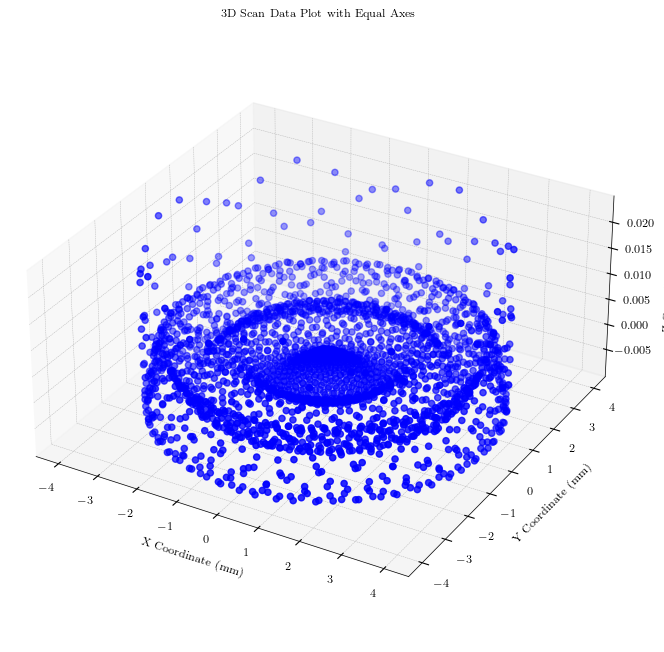

In [2657]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
R_SP = 4  # radius in mm
T = 0.546  # period in seconds
a = 16
b = 33
omega = 2 * np.pi / T
total_samples = int(T * sampling_rate)  # total samples in one period
print(total_samples)
# Time array
t = np.linspace(0, T, total_samples)

# Scan pattern equations
x_sp = R_SP * np.sin(a * omega * t)*np.sin(b * omega * t)
y_sp = R_SP * np.cos(b * omega * t)*np.sin(a * omega * t)
z_sp = (z_int-z).reshape(x_sp.shape)

# Update the dataset with z-coordinate
# Creating the dataset
scan_data = pd.DataFrame({
    'time': t,
    'x_coordinate': x_sp,
    'y_coordinate': y_sp,
    'z_coordinate':z_sp
})
filtered_data = scan_data[(scan_data['x_coordinate'] != 0) & (scan_data['y_coordinate'] != 0)]
print(scan_data.head())

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
ax.scatter(scan_data['x_coordinate'], scan_data['y_coordinate'], scan_data['z_coordinate'], c='blue', marker='o')

# Setting equal aspect ratio
ax.set_box_aspect([1,1,0.5])  # Equal aspect ratio

# Labeling the axes
ax.set_xlabel('X Coordinate (mm)')
ax.set_ylabel('Y Coordinate (mm)')
ax.set_zlabel('Z Coordinate (mm)')

# Setting the title
ax.set_title('3D Scan Data Plot with Equal Axes')

# Show plot
plt.show()


In [2658]:
dZ_dx,dZ_dy=zer.diff(x,y,beta)
dZ_dx

array([ 4.3146500141728910e-07, -4.5368972362973069e-04,
       -1.7590674124899352e-03, ..., -1.7590674124903533e-03,
       -4.5368972362987782e-04, -1.7977477661286832e-06])

In [2659]:
t=[t]
zer= Zer.Zer(10,total_samples,rho,theta)
zer.Construct_Zernike()
C=zer.Construct_C(t,1,10000,dZ_dx,dZ_dy)
M=zer.Construct_M(t,1,dZ_dx,dZ_dy)
Wudi=zer.Construct_bigmat()
z_wudi=np.hstack((z,np.zeros((6*(zer.Z_star-1)+3))))

In [2660]:

inverse=np.linalg.inv(np.dot(Wudi.T,Wudi))
beta = np.dot(inverse,np.dot(Wudi.T,z_wudi.T))
z_mo=np.dot(Wudi,beta)[0:total_samples]
beta=beta[0:zer.num_poly]
beta=zer.Regularization(beta,z)
z_final=np.dot(zer.Zernike,beta)

(66,)


In [2661]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
R_SP = 4  # radius in mm
T = 0.546  # period in seconds
a = 16
b = 33
omega = 2 * np.pi / T
total_samples = int(T * sampling_rate)  # total samples in one period
print(total_samples)
# Time array
t = np.linspace(0, T, total_samples)

# Scan pattern equations
x_sp = R_SP * np.sin(a * omega * t)*np.sin(b * omega * t)
y_sp = R_SP * np.cos(b * omega * t)*np.sin(a * omega * t)
z_sp = (z_final-z).reshape(x_sp.shape)

# Update the dataset with z-coordinate
# Creating the dataset
scan_data = pd.DataFrame({
    'time': t,
    'x_coordinate': x_sp,
    'y_coordinate': y_sp,
    'z_coordinate':z_sp
})
filtered_data = scan_data[(scan_data['x_coordinate'] != 0) & (scan_data['y_coordinate'] != 0)]
print(scan_data.head())

# Create a 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
ax.scatter(scan_data['x_coordinate'], scan_data['y_coordinate'], scan_data['z_coordinate'], c='blue', marker='o')

# Setting equal aspect ratio
ax.set_box_aspect([1,1,0.5])  # Equal aspect ratio

# Labeling the axes
ax.set_xlabel('X Coordinate (mm)')
ax.set_ylabel('Y Coordinate (mm)')
ax.set_zlabel('Z Coordinate (mm)')

# Setting the title
ax.set_title('3D Scan Data Plot with Equal Axes')

# Show plot
plt.show()


2730


ValueError: operands could not be broadcast together with shapes (66,) (2730,) 